In [1]:
# # 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('F:/hk2 nam3/nhi/is403/IS403_O21_04/Dataset/DXG Historical Data 1_6.csv')
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df = df[::-1]
df1=df.reset_index()['Price']
df1

0       13401.4
1       13371.1
2       13522.4
3       13159.4
4       14066.9
         ...   
1593    16550.0
1594    16800.0
1595    16850.0
1596    16850.0
1597    16800.0
Name: Price, Length: 1598, dtype: float64

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [6]:
test_size

160

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [10]:
X_train.shape

(1337, 100, 1)

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 84s 683ms/step - loss: 0.0607 - val_loss: 0.0022
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - loss: 0.0045 - val_loss: 0.0014
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - loss: 0.0023 - val_loss: 0.0015
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 257ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 274ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 321ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━

In [13]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 131ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step 


In [14]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [15]:
y_pred.shape

(59, 1)

In [16]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mae = np.mean(np.abs(ytest - y_pred))


print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 17935.599498812036
Testing MAPE: 6443906.613242737
Testing MAE: 17879.33480230587


In [17]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[:100].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.2927697]
101
1 day input [0.23388377 0.25162893 0.25517796 0.26585006 0.24453087 0.21968764
 0.19839344 0.20311715 0.22798537 0.23153441 0.25045425 0.2374328
 0.21731328 0.24335619 0.22561102 0.22561102 0.23033473 0.25755232
 0.258727   0.2634757  0.2528286  0.28122087 0.29186797 0.3001657
 0.30843845 0.30371474 0.30726377 0.31791087 0.3001657  0.30843845
 0.3108128  0.33328168 0.29896603 0.30488942 0.29069329 0.29896603
 0.30251506 0.30488942 0.30134038 0.32026023 0.33093232 0.33565603
 0.3167112  0.30488942 0.28949361 0.29186797 0.28359522 0.2876941
 0.29769138 0.29769138 0.30518934 0.31018797 0.31143763 0.3001907
 0.30518934 0.30893831 0.30393968 0.30768865 0.31518661 0.30768865
 0.31018797 0.31143763 0.31643627 0.32518389 0.32393423 0.31893559
 0.31268729 0.30144036 0.29644172 0.306439   0.30518934 0.31143763
 0.30518934 0.31143763 0.306439   0.30393968 0.30144036 0.30518934
 0.3001907  0.3001907  0.2939424  0.29644172 0.29519206 0.29269274
 0.29269274 0.29144308 0.29894104 0.30

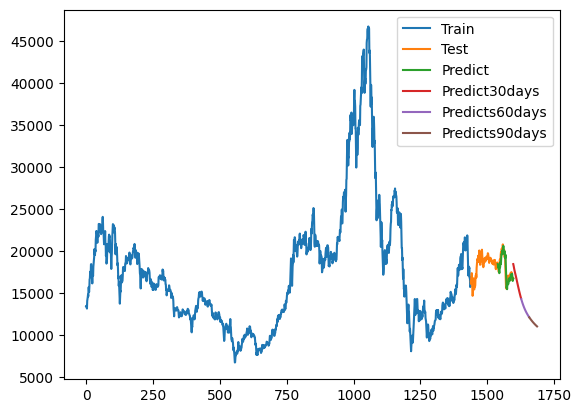

In [18]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

predict_data_index_30 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(predict_data_index_30,scaler.inverse_transform(lst_output[0:30]))
predict_data_index_60 = pd.RangeIndex(start=len(df1)+29, stop=len(df1)+59, step=1)
plt.plot(predict_data_index_60,scaler.inverse_transform(lst_output[30:60]))
predict_data_index_90 = pd.RangeIndex(start=len(df1)+59, stop=len(df1)+89, step=1)
plt.plot(predict_data_index_90,scaler.inverse_transform(lst_output[60:90]))

plt.legend(['Train','Test','Predict','Predict30days', 'Predicts60days', 'Predicts90days'])
plt.savefig('Team4_LSTM_DXG_9_1.png')
plt.show()
